<a href="https://colab.research.google.com/github/vamsiChittem/story-teller/blob/main/HandwrittenDigitRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load MNIST dataset from TensorFlow
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to range [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape data to add a channel dimension (needed for CNN)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')  # Output layer for 10 classes (digits 0-9)
])


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 33ms/step - accuracy: 0.9099 - loss: 0.2903 - val_accuracy: 0.9889 - val_loss: 0.0342
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 30ms/step - accuracy: 0.9867 - loss: 0.0420 - val_accuracy: 0.9888 - val_loss: 0.0340
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 31ms/step - accuracy: 0.9915 - loss: 0.0266 - val_accuracy: 0.9847 - val_loss: 0.0490
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9932 - loss: 0.0206 - val_accuracy: 0.9911 - val_loss: 0.0291
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 31ms/step - accuracy: 0.9952 - loss: 0.0140 - val_accuracy: 0.9895 - val_loss: 0.0337
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9965 - loss: 0.0102 - val_accuracy: 0.9906 - val_loss: 0.0313
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 31ms/step - accuracy: 0.9978 - loss: 0.0067 - val_accuracy: 0.9912 - val_loss: 0.0293
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9970 -

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9897 - loss: 0.0417
Test Accuracy: 99.24%


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


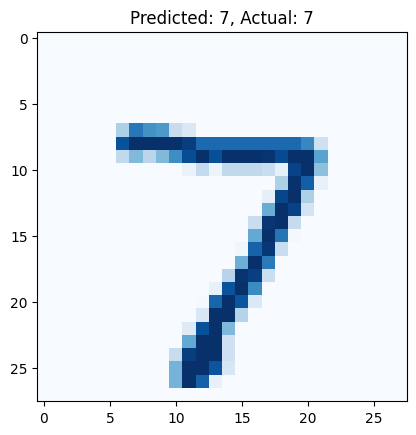

In [ ]:
predictions = model.predict(x_test)

# Plot an example
index = 0
plt.imshow(x_test[index].reshape(28,28), cmap='Blues')
plt.title(f"Predicted: {np.argmax(predictions[index])}, Actual: {y_test[index]}")
plt.show()


# New Section